In [23]:
import pandas as pd
import numpy as np 
import re
import os
from datetime import datetime
from collections  import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
bulletins=os.listdir("C:/Users/Downloads/Data Analysis Project/cityofla/Job Bulletins")
additional=os.listdir("C:/Users/Downloads/Data Analysis Project/cityofla/Additional data")
csvfiles=[]
for file in additional:
    if file.endswith('.csv'):
        print(file)
        csvfiles.append("C:/Users/Downloads/Data Analysis Project/cityofla/Additional data/"+file)

job_titles .csv
kaggle_data_dictionary - output_fields.csv


In [25]:
def to_dataframe(num,df):
                                 
       
    opendate=re.compile(r'(Open [D,d]ate:)(\s+)(\d+-\d+-\d+)')       #match open date
    
    salary=re.compile(r'\$(\d+,\d+)')       #match salary
    
    requirements=re.compile(r'(REQUIREMENTS?/\s?MINIMUM QUALIFICATIONS?)(.*)(PROCESS NOTE)')      #match requirements
    notes = re.compile(r'(NOTES|PROCESS NOTES)(.*)(WHERE TO APPLY)')  # match notes 
    ex = re.compile(r"(INTERDEPARTMENTAL PROMOTIONAL AND (AN )?OPEN COMPETITI?VE BASIS)(.*)(AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER)")
    ex1 = re.compile(r"(INTERDEPART?MENTAL PROMOTIONAL BASIS)(.*)(AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER)")
    ex2 = re.compile(r"(OPEN COMPETITIVE BASIS)(.*)(AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER)")
    # match the type of the exam    
    for no in range(0,num):
        with open("C:/Users/Downloads/Data Analysis Project/cityofla/Job Bulletins/"+bulletins[no],encoding="ISO-8859-1") as f:         #reading files 
                try:
                    file=f.read().replace('\t','') # remove any tab space between the data
                    data=file.replace('\n','') # remove any new line in data
                    headings=[heading for heading in file.split('\n') if heading.isupper()]    #getting heading from job bulletin

                    try:
                        sal = re.findall(salary,data) # get the salary value
                    except:
                        sal = np.nan # because some job not mention the salary so i made except to take make it read all files
                     
                        
                    # some of jobs write the date of year like (18) and other jobs write it like (2018) and other jobs not mention the datetime 
                    try:
                        date=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%y')
                    except NameError:
                        date=datetime.strptime(re.search(opendate,data).group(3),'%m-%d-%Y')
                    except:
                        date = np.nan
                        
                        
                        
                        # jobs mention the requirments in different sequence so i made all the possible types to get all requirments from data
                    try:
                        req=re.search(requirements,data).group(2)
                    except Exception as e:
                        try:
                            req=re.search('(.*)NOTES?',re.findall(r'(REQUIREMENTS?)(.*)(NOTES?)',
                                                              data)[0][1]).group(1)
                        except Exception as e:
                            try:
                                req=re.search('(.*)SELECTIVE CERTIFICATION?',re.findall(r'(REQUIREMENTS?)(.*)',
                                                              data)[0][1]).group(1)
                            except Exception as e:
                                try:
                                    req=re.search('(.*)PROCESS NOTES',re.findall(r'(REQUIREMENTS/MINIMUM QUALIFICATIONS?)(.*)',data)[0][1]).group(1)
                                except Exception as e:
                                    try:
                                        req=re.search('(.*)PROCESS NOTES',re.findall(r'(REQUIREMENTS/MINIMUM QUALIFICATIONS?)(.*)',data)[0][1]).group(1)
                                    except Exception as e:
                                        pass
                        
                    # get the duties 
                    try:
                        duties=re.search(r'(DUTIES)(.*)(REQ[A-Z])',data).group(2)
                    except:
                        duties = np.nan
                    # get the notes with different sequence
                    try:
                        note = re.search(notes,data).group(2) 
                    
                    except Exception as e:
                        try:
                            note=re.search('(.*)WHERE TO APPLY?',re.findall(r'(PROCESS NOTES|NOTES?)(.*)',
                                                              data)[0][1]).group(1)  
                        except Exception as e:
                            try:
                                note = re.search('(.*)JOB BENEFITS:',re.findall('(NOTES:?)(.*)',
                                          data)[0][1]).group(1)
                            except Exception as e:
                                pass
                            
                
                     # the exam written in many ways so made many ways to get all of them
                    try:
                        a = re.search(ex,data).group(1)
                    except:
                        try:
                            a = re.search(ex1,data).group(1)
                        except:
                            try:
                                a = re.search(ex2,data).group(1)
                            except:
                                pass
                    
                    
                    
                    
                    
                    
                    
                  ## append all the data that i'm extract to the dataframe columns
                    
                    df=df.append({'FILE_NAME':bulletins[no],'POSITION':headings[0].lower(),'salary_start':sal,
                               "OPEN_DATE":date,"REQUIREMENTS":req,'DUTIES':duties
                                ,'EXAM_TYPE':a,'notes':note},ignore_index=True)
                    
                    # get the other columns from the main columns
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)')
                    df['EXPERIENCE_LENGTH']=df['REQUIREMENTS'].apply(lambda x :  re.search(reg,x).group(1).lower() if re.search(reg,x) is not None  else 'zero')
                    df['FULL_TIME_PART_TIME'] = np.nan
                    df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full-time')] = 'FULL TIME'
                    df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('part-time')] = 'PART TIME'
                    df['FULL_TIME_PART_TIME'][df['REQUIREMENTS'].str.contains('full time')] = 'FULL TIME'
                    df['FULL_TIME_PART_TIME'].fillna('_',inplace = True)
                    reg=re.compile(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\s(college)')
                    df['EDUCATION_YEARS']=df['REQUIREMENTS'].apply(lambda x :  re.search(reg,x).group(1) if re.search(reg,x) is not None  else 'zero')
                    df['SCHOOL_TYPE'] = np.nan
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or trade school')] = 'college or trade school'
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('college or university')] = 'college or university'
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('apprenticeship')] = 'Apprenticeship'
                    df['SCHOOL_TYPE'][df['REQUIREMENTS'].str.contains('Apprenticeship')] = 'Apprenticeship'
                    df['SCHOOL_TYPE'].fillna('No School Type',inplace=True)
                    df['DRIVERS_LICENSE_REQ'] = np.nan
                    df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("driver's license is required")] = 'R'
                    df['DRIVERS_LICENSE_REQ'][df['notes'].str.contains("may require a valid California driver's license")] = 'M'
                    df['DRIVERS_LICENSE_REQ'].fillna('N',inplace=True) # n means Not Required
                    
                    
                 # to see the files that not extract or i have error with it   
                except Exception as e:
                    print('umatched sequence',no)
                    
                    
                
                
        
           
    return df

In [26]:
df=pd.DataFrame(columns=['FILE_NAME','POSITION','salary_start','OPEN_DATE','REQUIREMENTS','DUTIES'])
df=to_dataframe(len(bulletins),df) # called the function to get the data
df.to_csv('Suhaib Ennab.csv')

umatched sequence 172


In [27]:
df

,FILE_NAME,POSITION,salary_start,OPEN_DATE,REQUIREMENTS,DUTIES,EXAM_TYPE,notes,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,DRIVERS_LICENSE_REQ
0,311 DIRECTOR 9206 041814.txt,311 director,"[125,175, 155,514]",2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMP...,:1. In addition to the regular City applicatio...,one,FULL TIME,zero,college or university,N
1,ACCOUNTANT 1513 062218.txt,accountant,"[49,903, 72,996, 55,019, 80,472]",2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,OPEN COMPETITIVE BASIS,:1. Candidates from the eligible list are norm...,zero,_,four,college or university,M
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,"[49,005, 71,618]",2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETI...,1. Applicants who lack six months or less of t...,two,FULL TIME,zero,college or university,N
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,"[55,332, 80,930, 65,145, 95,254]",2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...",INTERDEPARTMENTAL PROMOTIONAL BASIS,:1. Candidates from the eligible list are norm...,two,FULL TIME,zero,No School Type,N
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,"[60,489, 88,468, 71,451, 104,462]",2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,INTERDEPARTMENTAL PROMOTIONAL BASIS,:1. Candidates from the eligible list are norm...,one,FULL TIME,four,college or university,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,WORKERS_ COMPENSATION CLAIMS ASSISTANT 1775 04...,workers' compensation claims assistant,"[51,385, 63,830, 58,860, 73,121]",2014-04-11,Two years of full-time paid clerical experienc...,A Workers' Compensation Claims Assistant perfo...,INTERDEPARTMENTAL PROMOTIONAL BASIS,:For information regarding reciprocity between...,two,FULL TIME,zero,No School Type,M
679,X-RAY AND LABORATORY TECHNICIAN 2358 012916.txt,annual salary,"[52,200, 76,295, 55,164, 80,638, 56,605, 70,323]",2016-01-29,1. Valid Limited Permits in X-Ray Technology i...,Takes and develops radiographic images accordi...,OPEN COMPETITIVE BASIS,:1. For information regarding reciprocity betw...,zero,_,zero,No School Type,M
680,ZOO CURATOR 4297 040816.txt,zoo curator,"[78,300, 94,712]",2016-04-08,1. Graduation from an accredited four-year col...,A Zoo Curator is responsible for the health an...,INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMP...,: 1. Applicants who lack six months or less...,three,FULL TIME,four,college or university,M
681,ZOO CURATOR OF EDUCATION 4300 091418.txt,zoo curator of education,"[57,628, 84,229, 67,922, 99,305, 82,663, 120,874]",2018-09-14,1. Graduation from an accredited four-year col...,"A Zoo Curator of Education plans, develops, im...",INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMP...,:1. Candidates from the eligible list are norm...,one,FULL TIME,four,college or university,M


#### here in the salary_start we see some jobs have many salary , that's because some jobs mentioned alot of salary from __ to __ , so i get all the salary from every job and take the average salary for each job

In [29]:
df['avg_salary'] = 0

for i in range(0,len(df['salary_start'])):
    ss = 0
    for y in range(0,len(df['salary_start'][i])):
        
        ss += float(df['salary_start'][i][y].replace(',',''))
        
        df['avg_salary'].iloc[i] = int(ss / len(df['salary_start'][i]))
    

#### replace the values of EXAM_type to the abbreviated values

In [32]:
df = df.replace({'EXAM_TYPE':{'INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS':'OPEN_INT_PROM',
                        'INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS':'OPEN_INT_PROM',
                        'INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITVE BASIS':'OPEN_INT_PROM',
                        'INTERDEPARTMENTAL PROMOTIONAL BASIS':'INT_DEPT_PROM',
                        'INTERDEPARMENTAL PROMOTIONAL BASIS':'INT_DEPT_PROM',
                        'OPEN COMPETITIVE BASIS':'OPEN'}})

##### we see the types of the column illogical values to convert the object types of some column to numerical columns

In [33]:
df.dtypes

FILE_NAME                      object
POSITION                       object
salary_start                   object
OPEN_DATE              datetime64[ns]
REQUIREMENTS                   object
DUTIES                         object
EXAM_TYPE                      object
notes                          object
EXPERIENCE_LENGTH              object
FULL_TIME_PART_TIME            object
EDUCATION_YEARS                object
SCHOOL_TYPE                    object
DRIVERS_LICENSE_REQ            object
avg_salary                      int64
dtype: object

In [34]:
df = df.replace({'EDUCATION_YEARS':{'zero':0,'four':4}})
df = df.replace({'EXPERIENCE_LENGTH':{'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7}})

In [36]:
df.dtypes

FILE_NAME                      object
POSITION                       object
salary_start                   object
OPEN_DATE              datetime64[ns]
REQUIREMENTS                   object
DUTIES                         object
EXAM_TYPE                      object
notes                          object
EXPERIENCE_LENGTH               int64
FULL_TIME_PART_TIME            object
EDUCATION_YEARS                 int64
SCHOOL_TYPE                    object
DRIVERS_LICENSE_REQ            object
avg_salary                      int64
dtype: object

### drop the salary_start because it not important any more , because i take the values of it and add it to the avg_salary

In [37]:
df = df.drop('salary_start',axis=1)

In [38]:
df

,FILE_NAME,POSITION,OPEN_DATE,REQUIREMENTS,DUTIES,EXAM_TYPE,notes,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EDUCATION_YEARS,SCHOOL_TYPE,DRIVERS_LICENSE_REQ,avg_salary
0,311 DIRECTOR 9206 041814.txt,311 director,2014-04-18,1. One year of full-time paid experience as a ...,A 311 Director is responsible for the successf...,OPEN_INT_PROM,:1. In addition to the regular City applicatio...,1,FULL TIME,0,college or university,N,140344
1,ACCOUNTANT 1513 062218.txt,accountant,2018-06-22,Graduation from an accredited four-year colleg...,An Accountant does professional accounting wor...,OPEN,:1. Candidates from the eligible list are norm...,0,_,4,college or university,M,64597
2,ACCOUNTING CLERK 1223 071318.txt,accounting clerk,2018-07-13,Two years of full-time paid office clerical ex...,An Accounting Clerk performs difficult and res...,OPEN_INT_PROM,1. Applicants who lack six months or less of t...,2,FULL TIME,0,college or university,N,60311
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,accounting records supervisor,2018-07-27,Two years of full-time paid experience as an A...,"An Accounting Records Supervisor assigns, revi...",INT_DEPT_PROM,:1. Candidates from the eligible list are norm...,2,FULL TIME,0,No School Type,N,74165
4,ADMINISTRATIVE ANALYST 1590 060118.txt,administrative analyst,2018-06-01,1. One year of full-time paid professional exp...,An Administrative Analyst performs professiona...,INT_DEPT_PROM,:1. Candidates from the eligible list are norm...,1,FULL TIME,4,college or university,M,81217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,WORKERS_ COMPENSATION CLAIMS ASSISTANT 1775 04...,workers' compensation claims assistant,2014-04-11,Two years of full-time paid clerical experienc...,A Workers' Compensation Claims Assistant perfo...,INT_DEPT_PROM,:For information regarding reciprocity between...,2,FULL TIME,0,No School Type,M,61799
679,X-RAY AND LABORATORY TECHNICIAN 2358 012916.txt,annual salary,2016-01-29,1. Valid Limited Permits in X-Ray Technology i...,Takes and develops radiographic images accordi...,OPEN,:1. For information regarding reciprocity betw...,0,_,0,No School Type,M,65204
680,ZOO CURATOR 4297 040816.txt,zoo curator,2016-04-08,1. Graduation from an accredited four-year col...,A Zoo Curator is responsible for the health an...,OPEN_INT_PROM,: 1. Applicants who lack six months or less...,3,FULL TIME,4,college or university,M,86506
681,ZOO CURATOR OF EDUCATION 4300 091418.txt,zoo curator of education,2018-09-14,1. Graduation from an accredited four-year col...,"A Zoo Curator of Education plans, develops, im...",OPEN_INT_PROM,:1. Candidates from the eligible list are norm...,1,FULL TIME,4,college or university,M,85436


# Now the data ready for solve the questions

### <span style="color:blue">Q1:

### <span style="color:green">A non-experienced job seeker wants to know what is the best job for him?

###### first i suggest that the jobs that not mentioned the experience it's equal to zero , let's see the number of jobs that required a zero experience

In [45]:
len(df[df['EXPERIENCE_LENGTH'] == 0])

99

### let's see the best job for them

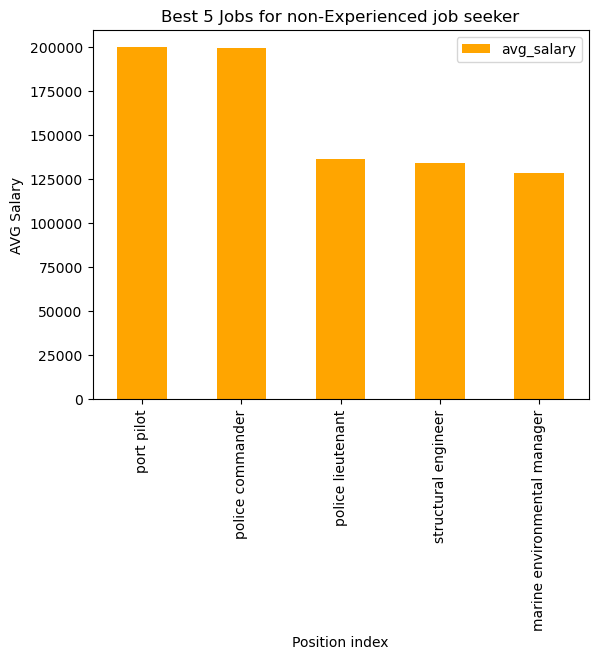

In [50]:
df[df['EXPERIENCE_LENGTH'] == 0][['POSITION','avg_salary']].sort_values(['avg_salary','POSITION'],ascending=False).head().plot.bar(color=['orange'])
plt.xlabel("Position index")
plt.ylabel("AVG Salary")
plt.title("Best 5 Jobs for non-Experienced job seeker")
p = ['port pilot','police commander','police lieutenant','structural engineer','marine environmental manager']
x = [0,1,2,3,4]
plt.xticks(x,p)
plt.show()


### <span style="color:blue">Q2:

### <span style="color:green">A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

#### the ansewr will be splited to 2 ansewrs , the first one is let's take all the values from the SCHOOL_TYPE 

In [52]:
df['SCHOOL_TYPE'].value_counts()

No School Type             440
college or university      196
Apprenticeship              40
college or trade school      7
Name: SCHOOL_TYPE, dtype: int64

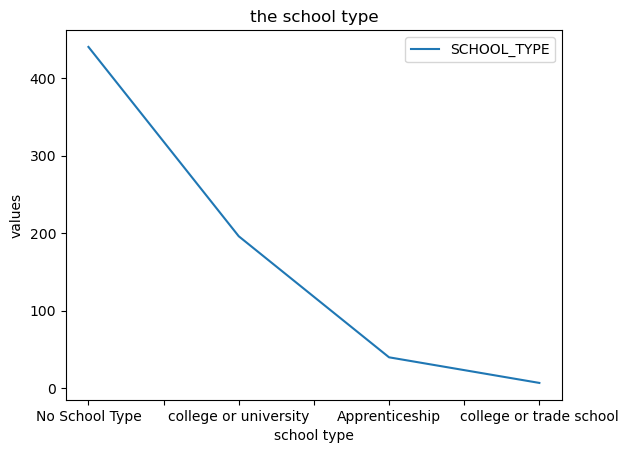

In [77]:
df['SCHOOL_TYPE'].value_counts().plot()
plt.title('the school type')
plt.xlabel('school type')
plt.ylabel('values')
plt.legend()
plt.show()


### the most type mentioned is "No School Type" , so if the child is not interested in studing and want to just work so i recommend them to enroll with these jobs

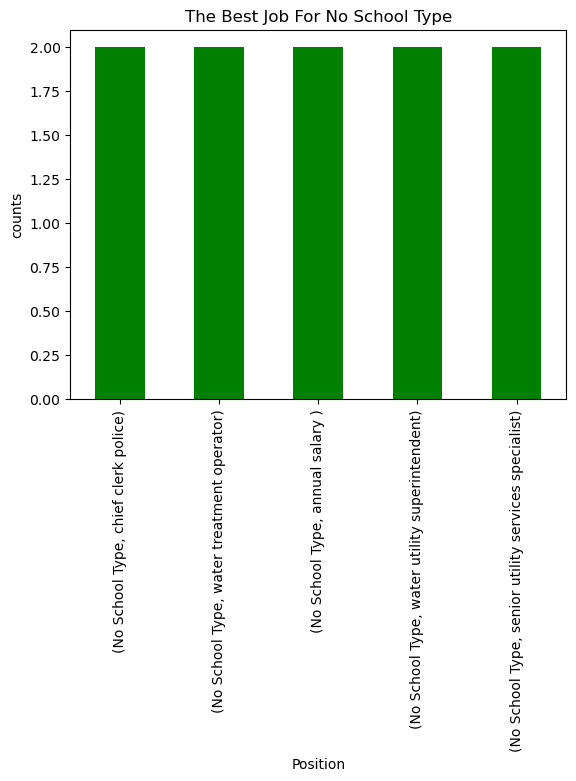

In [108]:
a = df[['SCHOOL_TYPE','POSITION']]
a = a[a['SCHOOL_TYPE'] == 'No School Type']
x = a.value_counts().head()
x.plot.bar(color='green')
plt.title('The Best Job For No School Type')
plt.xlabel('Position')
plt.ylabel('counts')
plt.show()

### the second answer is if the child is interested with studing ,so i'll drop the the 'no school type' ,and we will notice that the major value is 'college or university'

In [104]:
a = df['SCHOOL_TYPE']
a = a[a != 'No School Type']
a.value_counts()

college or university      196
Apprenticeship              40
college or trade school      7
Name: SCHOOL_TYPE, dtype: int64

### so i will take the 'college or university' and see the best job for this value

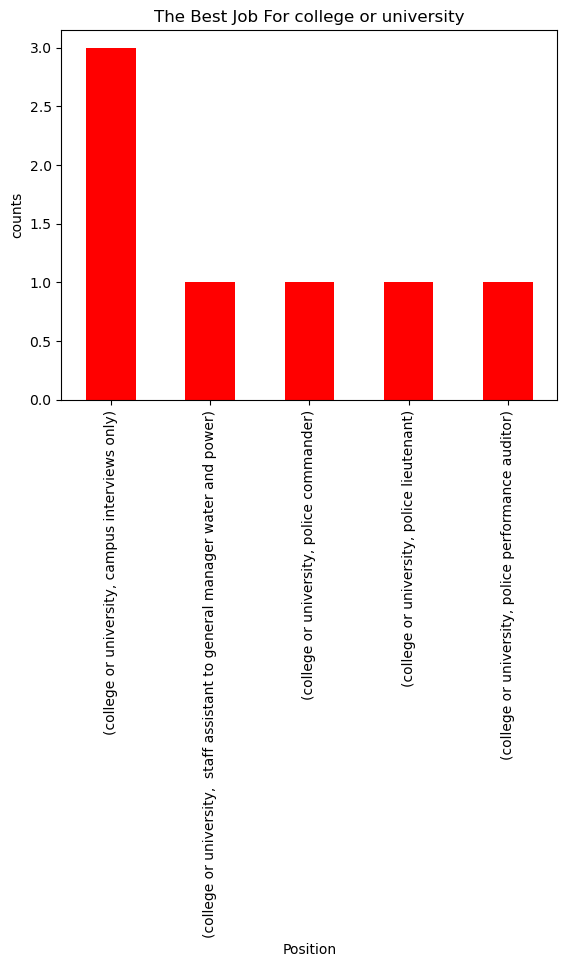

In [107]:
a = df[['SCHOOL_TYPE','POSITION']]
a = a[a['SCHOOL_TYPE'] == 'college or university']
a.value_counts().head().plot.bar(color='red')
plt.title('The Best Job For college or university')
plt.xlabel('Position')
plt.ylabel('counts')
plt.show()

### <span style="color:blue">Q3:

### <span style="color:green">What the best time in the year to be ready for a job applying in any experience level?

### so as the question mentioned in any experience level so i'll group the year and see the best time to apply for the job

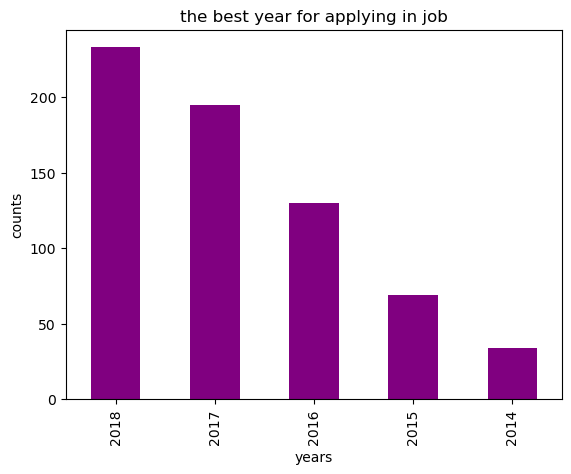

In [112]:
year = df['OPEN_DATE'].dt.year 
# as i mentioned befor that some job not have an open date so i say that is equal to zero 
year = year.fillna(0)
year = year.astype(int)
year.value_counts().head().plot.bar(color='purple')
plt.title('the best year for applying in job')
plt.xlabel('years')
plt.ylabel('counts')
plt.show()

#### we can figure out that With the progress of the years, we see that jobs have increased and the application for work is increasing

### <span style="color:blue">Q4:

### <span style="color:green">Is experience more important than educational level?

In [115]:
df['REQUIREMENTS'].str.contains('experience').sum()


629

In [119]:
sum(df['SCHOOL_TYPE'] != 'No School Type')


243

### here we will notice that the experience mentioned more that any educational level , and that make a view for us that the experience is more important that any educational level

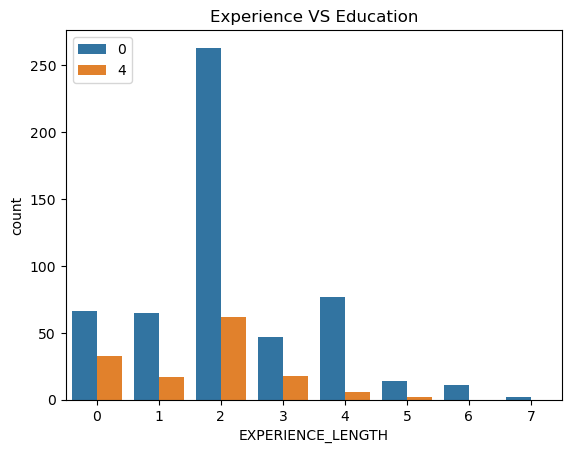

In [124]:
sns.countplot(data = df,x='EXPERIENCE_LENGTH',hue='EDUCATION_YEARS')
plt.title('Experience VS Education')
plt.legend()
plt.show()

### and that plot between experience length and educational level is confirms that the experience for 0 education year is more that 4 years education years

### <span style="color:blue">Q5:

### <span style="color:green">Which fresh grade job that will guarantee many job offers in the future for him?

In [ ]:
### i take all positions and take the first name and count them and see the most 10 common position

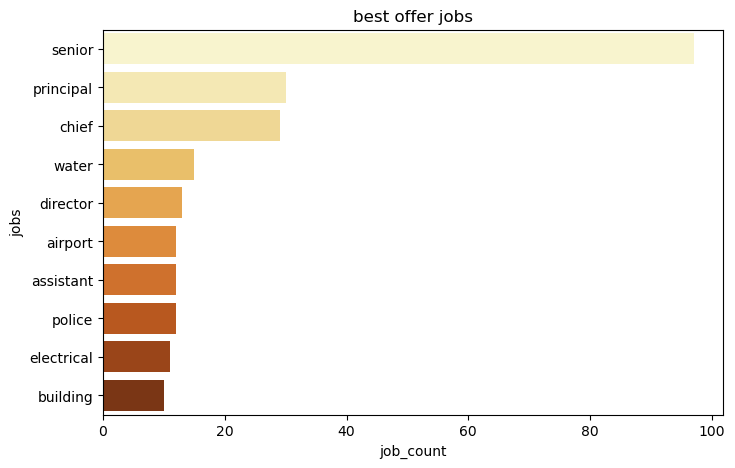

In [128]:
a = []
for i in range(0,len(df['POSITION'])):
    a.append(df['POSITION'][i].split()[0])

plt.figure(figsize=(8,5))
aa = Counter(a)
q = aa.most_common(10)
x,b=map(list, zip(*q))
sns.barplot(b,x,palette='YlOrBr') 
plt.title('best offer jobs')
plt.xlabel("job_count")
plt.ylabel('jobs')
plt.show()    


### <span style="color:blue">Q6:

### <span style="color:green">"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.
### <span style="color:green">AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER 
### <span style="color:green">The above statment is qouted from one of the job descriptions.
### <span style="color:green">Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

### first to see if there is a bias we need to collect the words that referes to any bias, so i collect the gender bais from many resourses

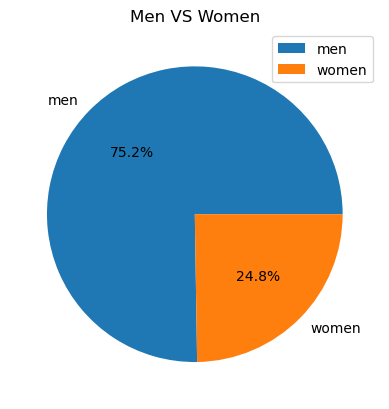

In [132]:
# words for bias men
men = ['strong','lead','leaders','analysis','analyze','analytical','individual',
'individuals','decisions','driven','competitive','expert','objectives'
,'principles','Active','Ambitious','Aggressive','Superior','Independent','Determined',
'analy','assert','battle','decision','force','greedy','opinion','honor','fulfill','space','plan','self confiden'
,'domina','logic','superior','outspoken','champion','stubborn','capable','support','active' 
'adventurous', 'aggressive', 'ambitious','ambition','analytical','assertive','autonomous','decisive','determined', 
'dominant','dominating','independent','lead','ninja','objective','outspoken','rock star','superior','he','his','him','himself']
# words for bias women
women = ['support','share','responsible','understanding','together','committed',
'interpersonal','feel','collaborate','collaboration','connect','depend','honest','yield','enthusias',
'compassion','kind','pleasant','polite','warm','cheer','kinship','pleasant','polite','share','quiet','respect','love'
,'devotion','talking','life','nurture ','healing','sensitiv','pleasant','caring','cooperat','inter dependen','communal','relationships',
'commit' ,'connect','considerate','cooperate','depend','honest','interpersonal','loyal','pleasant','polite','responsible',
'support ','together','trust','understand','kind','modesty','empath','she','her','herself','respone','receive','communication','life','validation','community']

aa = []
aa = ''.join(df['REQUIREMENTS'])
aa = aa.split()
aa = [i.lower() for i in aa]

output = {}
for word in men:
    output[word] = df['REQUIREMENTS'].str.contains(word).sum()
    
man = sum(output.values())

output = {}
for word in women:
    output[word] = df['REQUIREMENTS'].str.contains(word).sum()
    
woman = sum(output.values())
qqq = ['men','women']
ww = [man,woman]
plt.pie(ww,labels=qqq, autopct = '%1.1f%%')
plt.legend()
plt.title('Men VS Women')
plt.show()

### the plot shows to us that the words that referes for bias for men is more than the women words and that means that the statment that quotes is wrong and the governate has a bias for men over women

### <span style="color:blue">Q7:

### <span style="color:green">The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

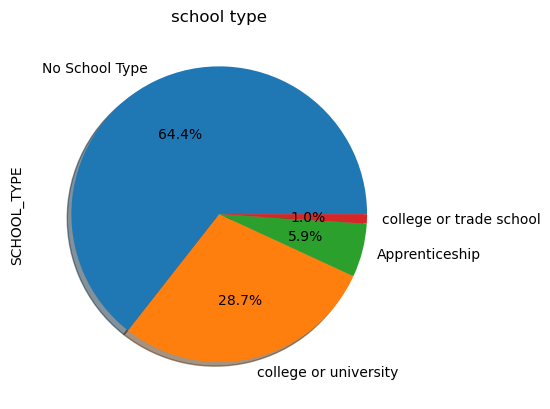

In [148]:
df['SCHOOL_TYPE'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('school type')
plt.show()

### as we see that (no school type) more that any one, and came after it (college or university) ,so on my opinion i suggest to bulid a new school to encourage to get more experience and with the work environments

## also i can suggest that the length of that new schools being about 2 years or 3 years , why????

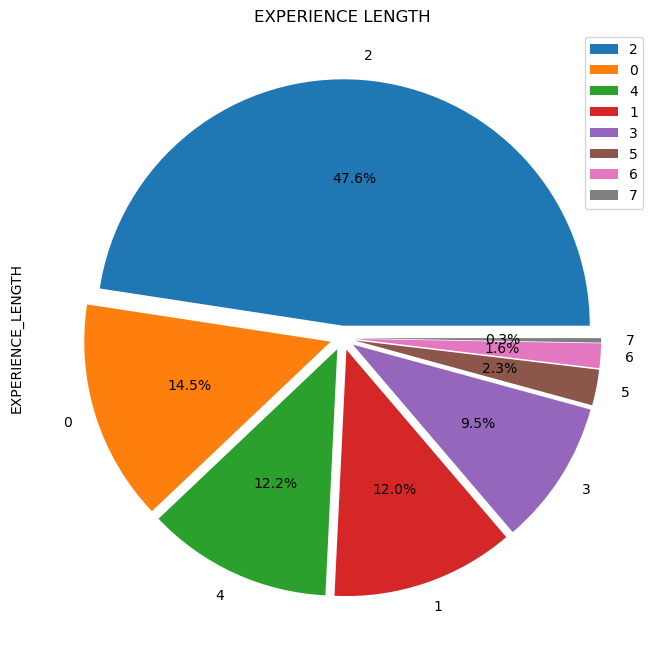

In [154]:
plt.figure(figsize=(11,8))
df['EXPERIENCE_LENGTH'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.title('EXPERIENCE LENGTH')
plt.legend()
plt.show()

### the answer of that question is as we see here that the most experience mentioned on the job requirment is 2 years

### <span style="color:blue">Q8:

### <span style="color:green">What is the average salary for worker with a driver license?

## firstly let's take the salary for jobs who required u to have a license or may u have a license

In [185]:
a = df[['avg_salary','DRIVERS_LICENSE_REQ']]
a = a[a['DRIVERS_LICENSE_REQ'] == 'R']
x = a.mean()
b = df[['avg_salary','DRIVERS_LICENSE_REQ']]
b = b[b['DRIVERS_LICENSE_REQ'] == 'M']
z = b.mean()
w = x + z / 2

### to specify the AVG salary for whom have required license or may have a license

<AxesSubplot:xlabel='DRIVERS_LICENSE_REQ'>

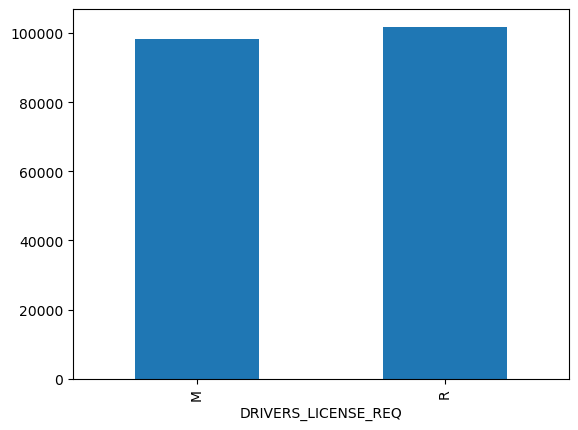

In [186]:
a = df[['avg_salary','DRIVERS_LICENSE_REQ']]
a = a[a['DRIVERS_LICENSE_REQ'] != 'N']
a.groupby(['DRIVERS_LICENSE_REQ'])['avg_salary'].mean().plot.bar()

### in the plot we see that who must have a license the AVG salary for him more that who may have a license

## <span style="color:blue">Q9:

### <span style="color:green">list the most feature that effect the salary of the worker.

#### the salary has many feature that effect of the worker like the experience , school type ,education years , full time or part time and driver license 

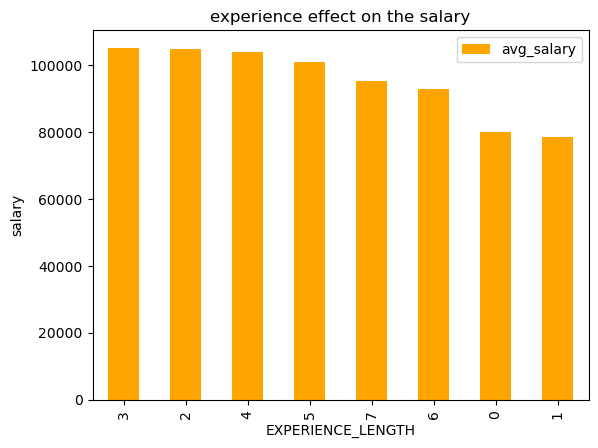

In [198]:
df1 = df[['avg_salary','EXPERIENCE_LENGTH']]
df1.groupby(['EXPERIENCE_LENGTH']).mean().sort_values(by='avg_salary',ascending=False).plot.bar(color='orange')
plt.title('experience effect on the salary')
plt.ylabel('salary')
plt.legend()
plt.show()

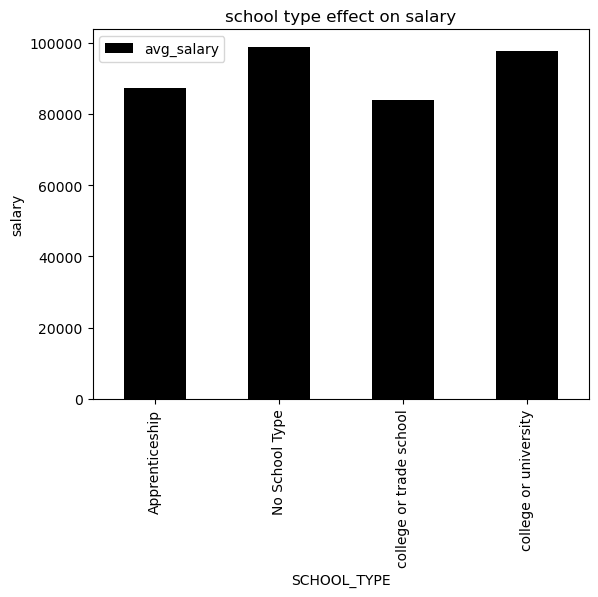

In [199]:
df1 = df[['avg_salary','SCHOOL_TYPE']]
df1.groupby(['SCHOOL_TYPE']).mean().plot.bar(color='black')
plt.title('school type effect on salary')
plt.ylabel('salary')
plt.show()

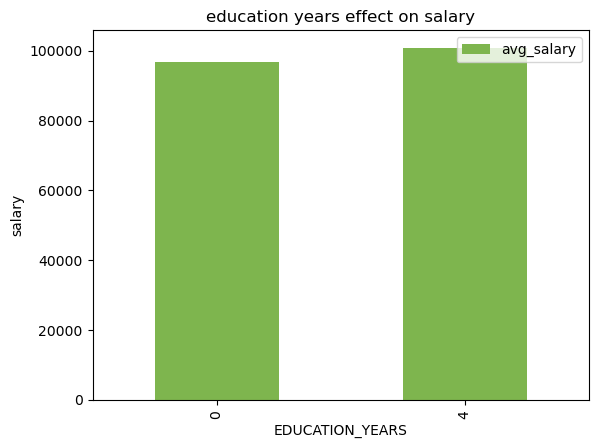

In [200]:
df1 = df[['avg_salary','EDUCATION_YEARS']]
df1.groupby(['EDUCATION_YEARS']).mean().plot.bar(color='#7eb54e')
plt.title('education years effect on salary')
plt.ylabel('salary')
plt.show()

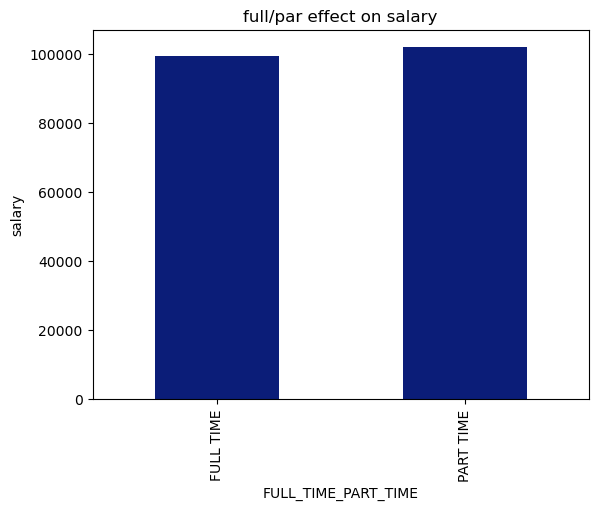

In [203]:
df1 = df[['avg_salary','FULL_TIME_PART_TIME']]
df1 = df1[df1['FULL_TIME_PART_TIME'] !='_']
df1.groupby(['FULL_TIME_PART_TIME'])['avg_salary'].mean().plot.bar(color='#0b1d78')
plt.title('full/par effect on salary')
plt.ylabel('salary')
plt.show()

### here we see that the part time the salary more that full time and that because the most jobs require full time and only 3 jobs require part time, so that why the part time more that full time

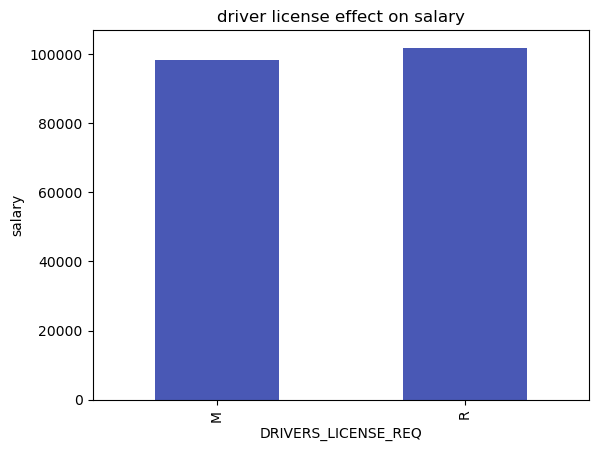

In [213]:
df1 = df[['avg_salary','DRIVERS_LICENSE_REQ']]
df1 = df1[df1['DRIVERS_LICENSE_REQ'] !='N']
df1.groupby(['DRIVERS_LICENSE_REQ'])['avg_salary'].mean().plot.bar(color='#4958B5')
plt.title('driver license effect on salary')
plt.ylabel('salary')
plt.show()

## <span style="color:blue">Q10:

## <span style="color:green">Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [215]:
df.describe()

,EXPERIENCE_LENGTH,EDUCATION_YEARS,avg_salary
count,683.000000,683.000000,683.000000
mean,2.077599,0.808199,97641.272328
std,1.348882,1.607294,32449.189876
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,75689.000000
50%,2.000000,0.000000,93536.000000
75%,3.000000,0.000000,116092.500000
max,7.000000,4.000000,273632.000000


## most jobs require 2 years of experiance about 47% of these jobs require 2years of expereiance 
## most education years (80%) are equal to zero 
## as the years increase the demand of jobs increases 
### the average of the salary of jobs is (97641.27)


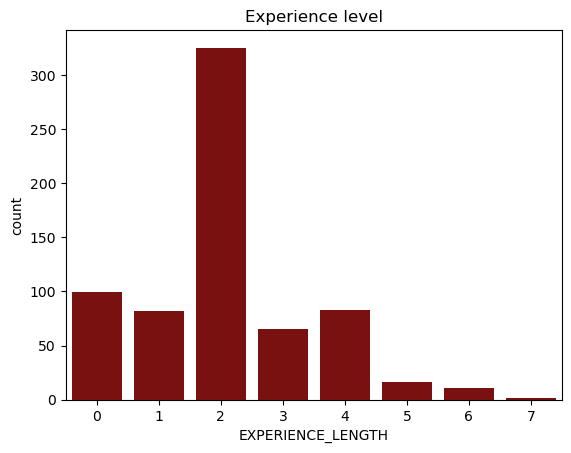

In [222]:
sns.countplot(data=df,x='EXPERIENCE_LENGTH',color = 'darkred')
plt.title('Experience level')
plt.show()

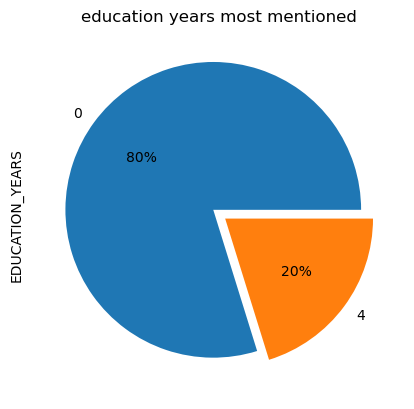

In [228]:
df['EDUCATION_YEARS'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05))
plt.title('education years most mentioned')
plt.show()

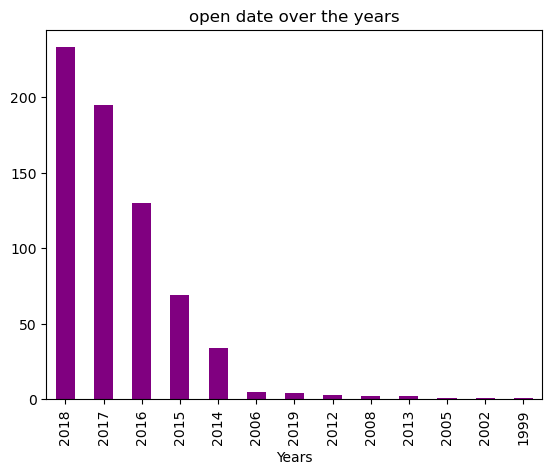

In [230]:
a  = year
a = a[a != 0]
a.value_counts().plot.bar(color='purple')
plt.xlabel('Years')
plt.title('open date over the years')
plt.show()

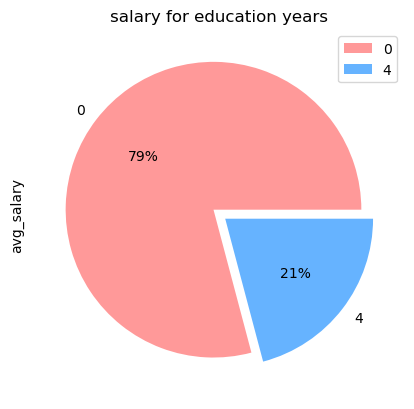

In [236]:
df.groupby('EDUCATION_YEARS').sum().plot(kind='pie',y='avg_salary',autopct='%1.0f%%',explode=(0.05,0.05),colors=['#ff9999','#66b3ff'])
plt.title('salary for education years')
plt.legend()
plt.show()

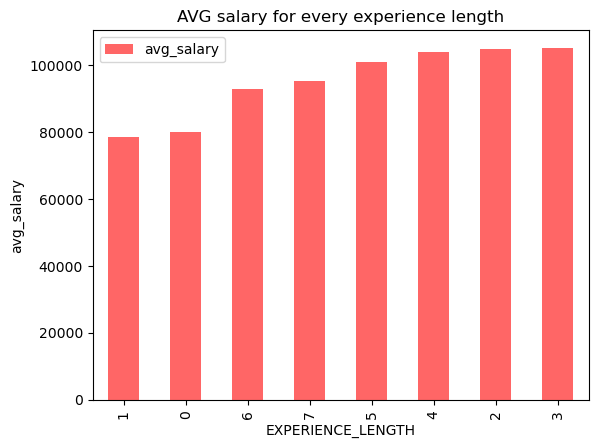

In [244]:
df[['EXPERIENCE_LENGTH','avg_salary']].groupby('EXPERIENCE_LENGTH').mean().sort_values(by='avg_salary').plot.bar(color='#ff6666')
plt.title('AVG salary for every experience length')
plt.ylabel('avg_salary')
plt.show()

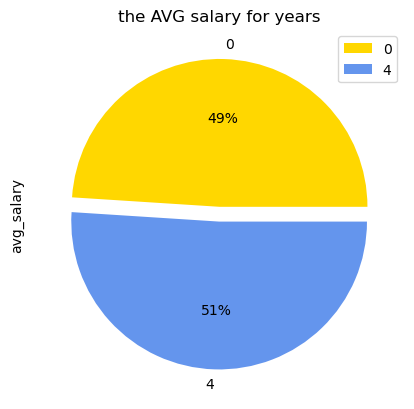

In [250]:
df[['EDUCATION_YEARS','avg_salary']].groupby('EDUCATION_YEARS').mean().sort_values(by='avg_salary').plot.pie(subplots=True,autopct='%1.0f%%',explode=(0.05,0.05),colors=['gold','cornflowerblue'])
plt.legend()
plt.title('the AVG salary for years')
plt.show()

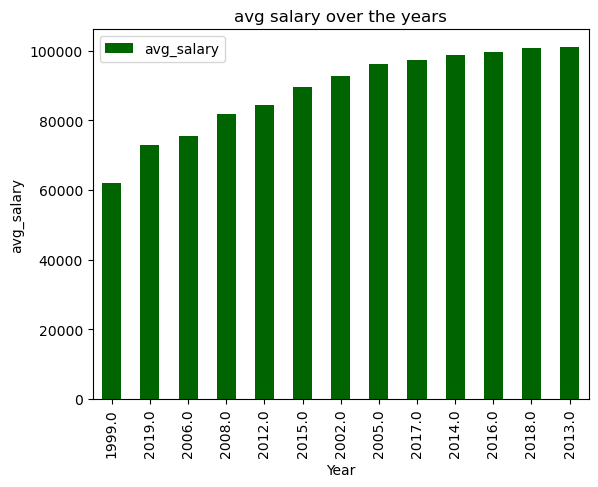

In [270]:
df['Year'] = year
a = df[['Year','avg_salary']]
a = a[a['Year'] != 0]
a.groupby('Year').mean().sort_values(by='avg_salary').plot.bar(color='darkgreen')
plt.title('avg salary over the years')
plt.ylabel('avg_salary')
plt.show()

## <span style="color:blue">Q11:

## <span style="color:green">Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


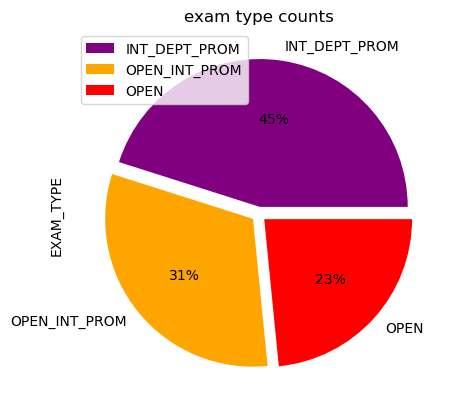

In [286]:
df['EXAM_TYPE'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05,0.05),colors=['purple','orange','red'])
plt.title('exam type counts')
plt.legend(loc='upper left')

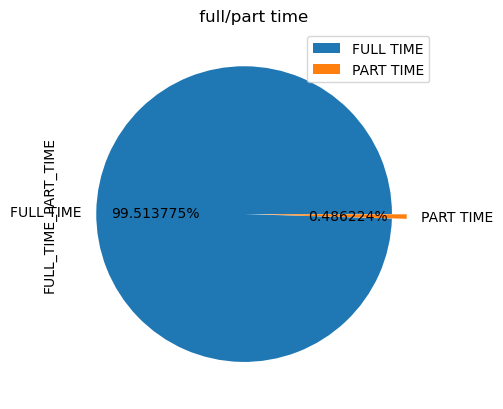

In [284]:
a = df['FULL_TIME_PART_TIME']
a[a != '_'].value_counts().plot.pie(autopct='%1f%%',explode=(0.05,0.05))
plt.legend()
plt.title(' full/part time')
plt.show()

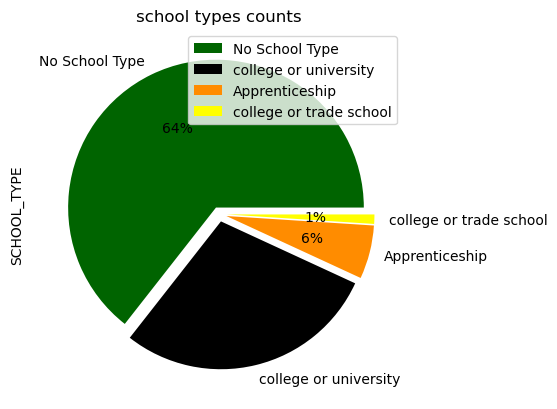

In [294]:
df['SCHOOL_TYPE'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05,0.05,0.05),colors=['darkgreen','black','darkorange','yellow'])
plt.title('school types counts')
plt.legend(loc='upper right')
plt.show()

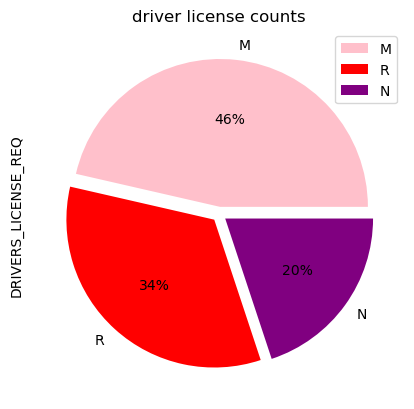

In [298]:
df['DRIVERS_LICENSE_REQ'].value_counts().plot.pie(autopct='%1.0f%%',explode=(0.05,0.05,0.05),colors=['pink','red','purple'])
plt.title('driver license counts')
plt.legend()
plt.show()

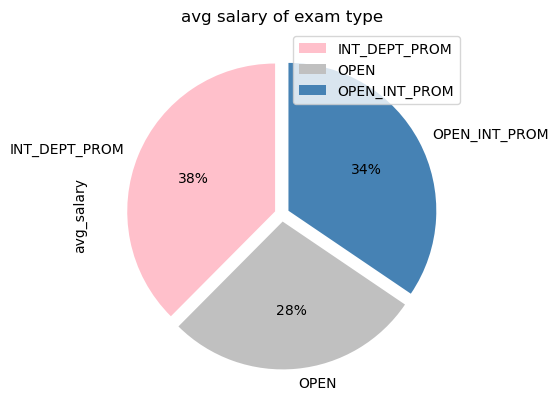

In [300]:
colors = ['pink', 'silver', 'steelblue']
explode = (0.05, 0.05, 0.05)
a = df[['EXAM_TYPE','avg_salary']]
a.groupby('EXAM_TYPE').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',colors=colors,explode=explode,startangle=90)
plt.title('avg salary of exam type')
plt.show()

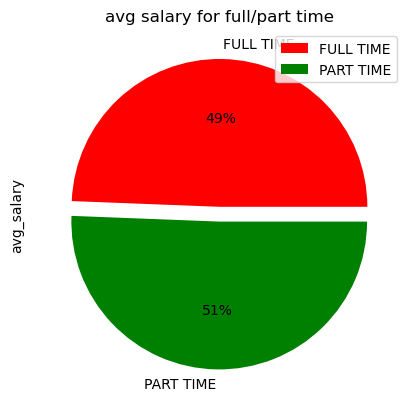

In [302]:
a = df[['FULL_TIME_PART_TIME','avg_salary']]
a = a[a['FULL_TIME_PART_TIME'] != '_']
explode = (0.05, 0.05)
c = ['red','green']
a.groupby('FULL_TIME_PART_TIME').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',explode=explode,colors=c)
plt.title('avg salary for full/part time')
plt.legend()
plt.show()

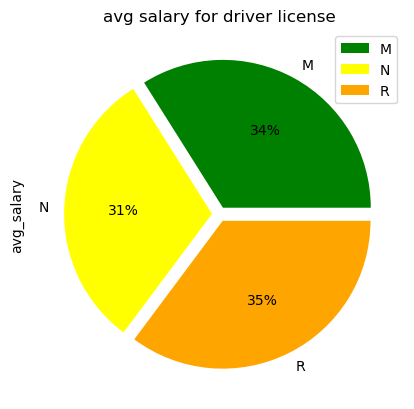

In [304]:
a = df[['DRIVERS_LICENSE_REQ','avg_salary']]
e = (0.05,0.05,0.05)
a.groupby('DRIVERS_LICENSE_REQ').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',explode=e,colors=['green','yellow','orange'])
plt.title('avg salary for driver license')
plt.legend()
plt.show()

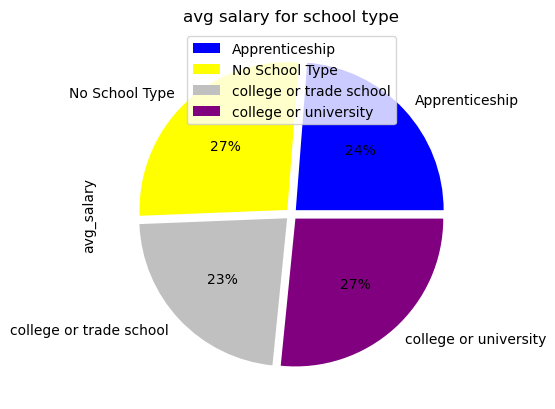

In [306]:
a = df[['SCHOOL_TYPE','avg_salary']]
a.groupby('SCHOOL_TYPE').mean().plot.pie(y='avg_salary',autopct='%1.0f%%',explode=[0.04,0.04,0.04,0.04],colors=['blue','yellow','silver','purple'])
plt.legend(loc='upper center')
plt.title('avg salary for school type')
plt.show()